In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [2]:
netbios_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\NetBios_resample_4000.csv')
netbios_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.019544,-0.034902,-0.014359,-0.00594,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
1,0.019544,-0.034870,-0.014359,-0.00594,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
2,0.019544,-0.034902,-0.014359,-0.00594,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
3,0.019544,-0.034869,-0.014359,-0.00594,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
4,0.019544,-0.034869,-0.014359,-0.00594,0.292062,-0.003071,1.153700,1.486555,1.495316,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,0.019544,-0.034901,-0.014359,-0.00594,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
6645,0.019544,-0.034902,-0.014359,-0.00594,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
6646,0.019544,-0.034902,-0.014359,-0.00594,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
6647,0.019544,-0.034869,-0.014359,-0.00594,0.898111,-0.003071,3.440546,4.416803,4.446881,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1


In [3]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [5]:
# novelty detection
df = pd.concat([benign_test_df, netbios_df], ignore_index=True)

In [6]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [7]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,-0.034901,-0.014359,-0.005940,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,-0.008811,...,-0.014919,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441
10648,-0.034902,-0.014359,-0.005940,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,-0.008811,...,-0.014919,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441
10649,-0.034902,-0.014359,-0.005940,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,-0.008811,...,-0.014919,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441
10650,-0.034869,-0.014359,-0.005940,0.898111,-0.003071,3.440546,4.416803,4.446881,-0.009313,-0.008811,...,-0.014919,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441


In [8]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0        1
1        1
2        1
3        1
4        1
        ..
10647    0
10648    0
10649    0
10650    0
10651    0
Name: Label, Length: 10652, dtype: int8

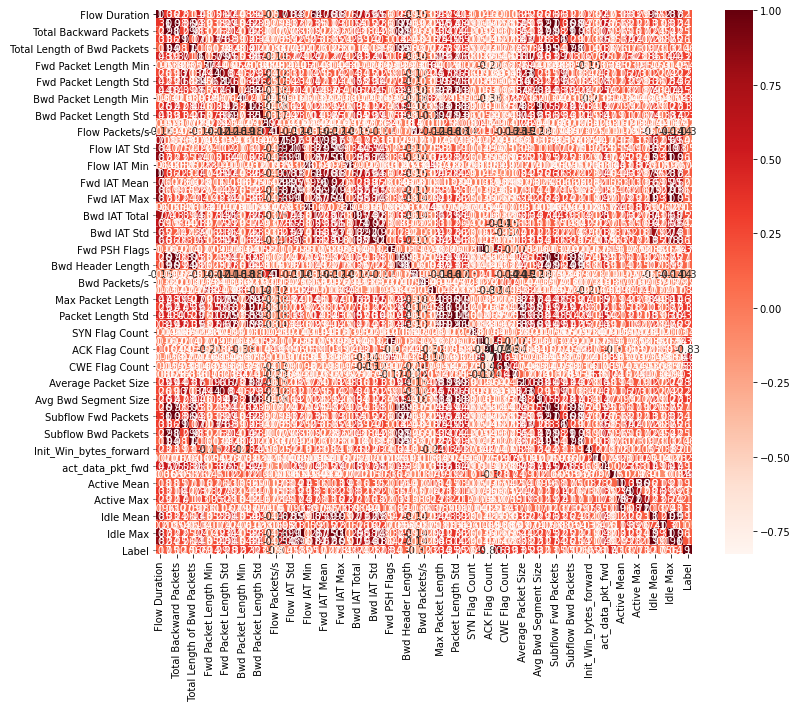

In [10]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.171091
 Total Fwd Packets              0.153064
 Total Backward Packets         0.118017
Total Length of Fwd Packets     0.151928
 Total Length of Bwd Packets    0.066033
                                  ...   
Idle Mean                       0.170058
 Idle Std                       0.055694
 Idle Max                       0.143560
 Idle Min                       0.190129
Label                           1.000000
Name: Label, Length: 65, dtype: float64

In [13]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Fwd Packet Length Max      0.286394
 Fwd Packet Length Mean     0.290698
 Fwd Packet Length Std      0.280715
Bwd Packet Length Max       0.323303
 Bwd Packet Length Min      0.317328
 Bwd Packet Length Mean     0.322875
 Bwd Packet Length Std      0.303043
 Flow Packets/s             0.300983
Bwd IAT Total               0.239648
Fwd PSH Flags               0.339550
Fwd Packets/s               0.302028
 Max Packet Length          0.339416
 Packet Length Mean         0.345240
 Packet Length Std          0.349946
 Packet Length Variance     0.261303
 RST Flag Count             0.339550
 ACK Flag Count             0.826709
 URG Flag Count             0.600087
 CWE Flag Count             0.387624
 Down/Up Ratio              0.327082
 Average Packet Size        0.353793
 Avg Fwd Segment Size       0.290698
 Avg Bwd Segment Size       0.322875
 Init_Win_bytes_backward    0.206105
 min_seg_size_forward       0.433519
Label                       1.000000
Name: Label, dtype: float64